In [1]:
# import libraries

import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
import os

In [20]:
# list all xvg files

xvg_all = sorted(list(Path().glob("rdf*r1*.xvg")))

In [21]:
# define plot options

font_size = 25
width = 2
params = {
    'axes.labelsize': font_size,
    'axes.linewidth': width,
    'axes.facecolor': 'white',
    'xtick.labelsize': font_size,
    'ytick.labelsize': font_size,
    'font.family' : 'CMU Serif',
    'text.usetex': True, 
    'text.latex.preamble': r'\usepackage{siunitx, mhchem}',
    'lines.linewidth' : 3,
    'lines.linestyle' : '-',
    'lines.marker' : None,
    'lines.markersize' : 10,
    'legend.fontsize': font_size,
    'axes.titlesize': 1.5*font_size,
    'legend.fontsize': font_size,
    'font.family': 'serif',
    'grid.color' : 'gray',
    'figure.figsize' : (12,7)
}

plt.rcParams.update(params)

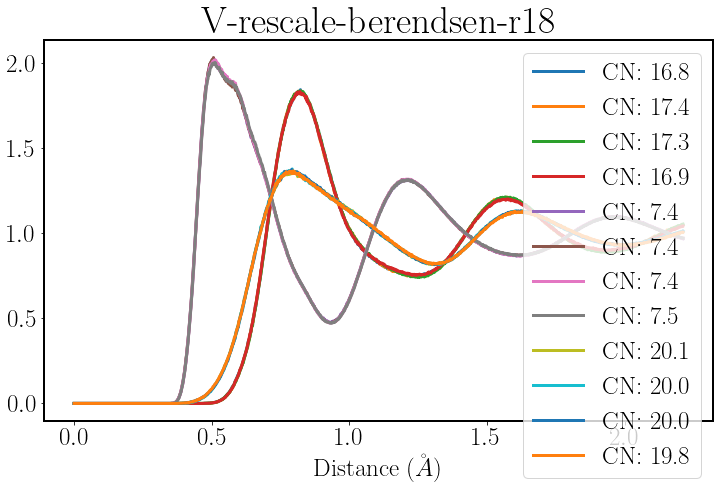

In [24]:
# filename = 'rdf_a-a_npt_equilibrium_363K-1bar_nose-hoover-parrinello-rahman.xvg'

for filename in xvg_all:
    filename = str(filename)
    title = filename.replace('.xvg','').split('_')[-1].capitalize()
    rdf_dict = {}
    cn_dict = {}
    x = []
    rdf_y = []
    cn_y = []

    with open(filename,'rt') as f:
        file = f.readlines()

    for line in file:
        if not line.startswith('#') and not line.startswith('@'):
            line = line.split()
            x.append(float(line[0].strip()))
            rdf_y.append(float(line[1].strip()))

    with open(filename.replace('rdf','cn'),'rt') as f:
        file = f.readlines()

    for line in file:
        if not line.startswith('#') and not line.startswith('@'):
            line = line.split()
            cn_y.append(float(line[1].strip()))

    rdf_dict['g(r)'] = rdf_y
    rdf_dict['CN'] = cn_y


    rdf_df = pd.DataFrame(rdf_dict)
    rdf_df.index = x
    rdf_df.index.name = 'Distance ($\AA$)'

    ##############################
    # Getting CN Value
    ##############################

    max_idx = rdf_df['g(r)'].argmax()
    min_idx = rdf_df['g(r)'].iloc[max_idx:].argmin()
    idx = max_idx + min_idx
    cn_value = str(round(rdf_df['CN'].iloc[idx],1))
    
#     plt.clf()
    rdf_df['g(r)'].plot(label='CN: {}'.format(cn_value))
    plt.legend()
    plt.title(title)
#     plt.show()
#     break